In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot

In [ ]:
def getURL(type_name, data):
    # type are limited: [ VHRMC, VHRDC, VHRSC, VHRFC, VHRAC ]
    # date are of different formatting for each types.
    # dates = ["201302",  "2013_01_15", "xxxx", "201301", "2013_01_01"]
    # typeDateSampleMapping = {
    #     "VHRMC" : "201302", #2013+feb #monthly
    #     "VHRDC" : "2013_01_15", #2013+jan+15 #daily
    #     "VHRSC" : "xxx", # custom set #seasonal data
    #     "VHRFC" : "201301", # 2013 + 01 #full data
    #     # "VHRAC" : "2013_01_01" # annual
    # }

    seasons = {
        "spring": "2013_03_01",
        "summer": "2013_07_01",
        "autumn": "2013_10_01",
        "winter": "2013_12_01"
    }

    types_COG_map = {
        "annual": { "name": "VHRAC", "dt": "daily", "formatting_base": "2013_01_", "formatting": "2013_01_01"}, #annual
        # "durinal": { "name": "VHRDC", "dt": "Time", "formatting_base": "2013_01_15", "formatting": "2013_01_15"}, #2013+jan+15 #daily # additional 15 days from jan1. A closed list
        "monthly": { "name": "VHRMC", "dt": "Month", "formatting_base": "2013", "formatting": "201302"}, #2013+feb #monthly
        "season": { "name": "VHRSC", "dt": "Season", "formatting_base": "", "formatting": "xxx" } # custom set #seasonal data
        "full": { "name": "VHRFC", "dt": "full", "formatting_base": "201301", "formatting": "201301" } , # 2013 + 01 #full data 
    }

    type = types_COG_map[type_name]

    Instruments = {
        "LIS": "LIS", 
        "OTD": "OTD"}

    # if(type_ip == "annual"):
    #     data = input("Enter day number (Hint: 1 to 365)")
    # elif(type_ip == "daily"):
    #     data = input("Enter hour (Hint: 24 hour format i.e. 0 to 23)")
    # elif(type_ip == "monthly"):
    #     data = input("Enter month number (Hint: 01 to 12)")
    # elif(type_ip == "season"):
    #     data = input("Enter season number (Hint: spring, summer, autumn, winter)")
    # # elif(type_ip == "full"):
    # #     data = input("")
    # else:
    #     print("wrong type input.")

    if (type_name == "season"):
        data = seasons[data]
        
    date = type[formatting_base] + data # NOTE: for full, we do not need any data offsets.
    baseUrl = "https://wug8w3fg42.execute-api.us-west-2.amazonaws.com/development/singleband"
    url =  f"{baseUrl}/{type['name']}/{date}/{Instruments['LIS']}/" + "{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]"
    return url
    # "https://wug8w3fg42.execute-api.us-west-2.amazonaws.com/development/singleband/VHRSC/2013_07_01/LIS/{z}/{x}/{y}.png?colormap=terrain&stretch_range=[0.00010455249866936356,0.06766455620527267]

In [ ]:
# base configs and dictonary defination
baseurl = "https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS"

types_CGTIF = {
     "annual": { "name": "VHRAC", "dt": "Time"},
     "daily": { "name": "VHRDC", "dt": "Time"},
     "monthly": { "name": "VHRMC", "dt": "Month"},
     "season": { "name": "VHRSC", "dt": "Season"}
     #add for full
}

In [4]:
type_ip = input("Enter one of the following type: \n1.annual \n2.daily \n3.monthly \n2.season \n ==>")

Enter one of the following type: 
1.annual 
2.daily 
3.monthly 
2.season 
 ==> daily


In [5]:
# Take inputs and based off it, generate URL
# type_ip = "monthly" # change it; take input
type = types_CGTIF[type_ip]
#data = "input data according to type_ip name" #maybe put a validation


In [6]:
if(type_ip == "annual"):
    data = input("Enter day number (Hint: 1 to 365)")
elif(type_ip == "daily"):
    data = input("Enter hour (Hint: 24 hour format i.e. 0 to 23)")
elif(type_ip == "monthly"):
    data = input("Enter month number (Hint: 1 to 12)")
elif(type_ip == "season"):
    data = input("Enter season number (Hint: 1 to 4)")
else:
    print("wrong type input.")

Enter hour (Hint: 24 hour format i.e. 0 to 23) 22


In [7]:
# The URL to fetch geotif image according to the input types
URL = f'{baseurl}/{type["name"]}_LIS_FRD_cogs/{type["name"]}_LIS_FRD_{type["dt"]}_{data}.0_co.tif'
print(URL)

https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRDC_LIS_FRD_cogs/VHRDC_LIS_FRD_Time_22.0_co.tif


Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRDC_LIS_FRD_cogs/VHRDC_LIS_FRD_Time_22.0_co.tif.msk: 403
Warning 1: HTTP response code on https://ghrc-cog.s3.us-west-2.amazonaws.com/TRMM-LIS/VHRDC_LIS_FRD_cogs/VHRDC_LIS_FRD_Time_22.0_co.tif.MSK: 403


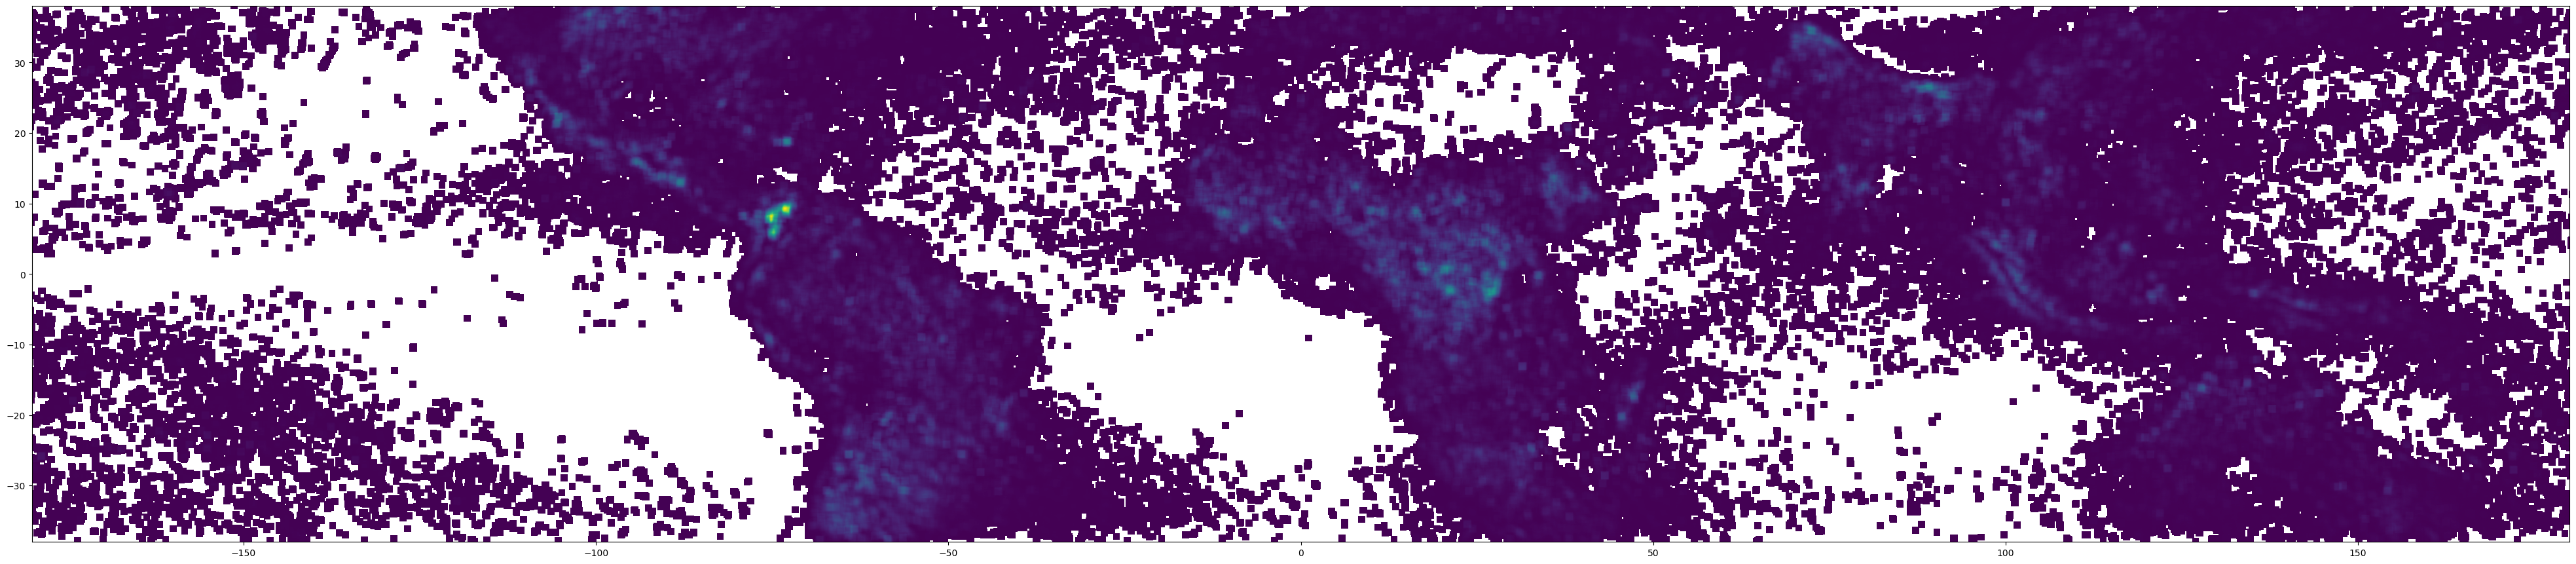

<AxesSubplot: >

In [8]:

dataset = rasterio.open(URL)
pyplot.figure(figsize=(50, 25))
# pyplot.imshow(dataset.read(1), cmap='gray')
# pyplot.show(dataset)
show(dataset)
# show(dataset.read(), transform=dataset.transform)

# ROUGH

In [9]:
# fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
# show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
# show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
# show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')
# pyplot.show()

In [10]:
print(dataset.count)
print(f'{dataset.width} x  {dataset.height}')
print(dataset.crs)

1
3600 x  760
EPSG:4326


# PLOTLY MAPBOX INTEGRATION

In [11]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [12]:
# import plotly.express as px
# fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
# fig.show()

In [13]:
import plotly.express as px

fig = px.choropleth_mapbox(color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

In [18]:
us_cities

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487
